## Université de Poitiers, Master 1 IOI
# Méthodes de Clustering : K-means et CAH
- Rania BEN DHIA, rania.ben.dhia@etu.univ-poitiers.fr
- Marwan AL OMARI, marwan.al.omari@etu.univ-poitiers.fr

###  1.     Initiation à Python et à l’usage des principales librairies

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
import random
import os
from sklearn.metrics import silhouette_samples, silhouette_score
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, fcluster, linkage , linkage as CAH
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import adjusted_rand_score
import matplotlib.image as mpimg
%matplotlib inline
from PIL import Image
import pandas as pd
from importlib import reload
import cv2

## 1.1 Tests élémentaires sous Python
### 1.1.1 Creation du corpus de test

In [3]:
# Simulation de n=256 données X=(X1,X2) suivant une loi normale bidimensionnelle
# de moyenne (0,0), de la variance Var(X1)=1, Var(X2)=1 et la covariance Cov(X1,X2)=0.5
mean1 = np.array([4,4])
cov1 = np.array([[2,0],[0,2]])
X1 = np.random.multivariate_normal(mean1,cov1,128)
mean2 = np.array([-4,-4])
cov2 = np.array([[6,0],[0,6]])
X2 = np.random.multivariate_normal(mean2,cov2,128)
data = np.concatenate((X1,X2), axis=0)
data=np.transpose(data)

In [4]:
# RAW Data
data.shape
data=data.T
# après transposition des données
data.shape
# Affichage des données numérique
data

array([[ 7.28035304e+00,  5.21310897e+00],
       [ 1.72130717e-02,  5.21226537e+00],
       [ 5.11922829e+00,  4.99764194e+00],
       [ 5.36576481e+00,  2.96207829e+00],
       [ 1.11971210e+00,  3.82291406e+00],
       [ 2.98121497e+00,  2.35597801e+00],
       [ 4.98835501e+00,  1.82024086e+00],
       [ 4.44277927e+00,  3.24135812e-01],
       [ 5.13132960e+00,  5.77113806e+00],
       [ 4.56393062e+00,  5.06954942e+00],
       [ 3.67762276e+00,  3.87667826e+00],
       [ 2.53735820e+00,  2.77405353e+00],
       [ 3.53158512e+00,  7.18146292e+00],
       [ 4.21828779e+00,  5.16993022e+00],
       [ 6.80664575e+00,  7.03175643e+00],
       [ 5.96838780e+00,  2.03570304e+00],
       [ 5.46249303e+00,  3.51850073e+00],
       [ 5.17484205e+00,  5.27447498e+00],
       [ 3.00169158e+00,  3.21989009e+00],
       [ 4.78715791e+00,  3.42962668e+00],
       [ 3.96655791e-01,  3.77274268e+00],
       [ 2.92623279e+00,  4.05006982e+00],
       [ 4.75075617e+00,  4.40156286e+00],
       [ 4.

<function matplotlib.pyplot.legend(*args, **kwargs)>

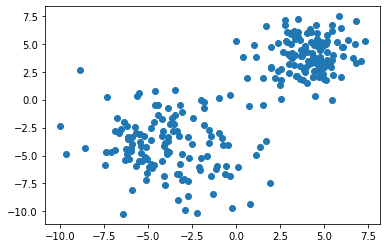

In [5]:
# Affichage des données graphique

plt.plot(data[:,0],data[:,1],"o",label = 'Individu')
plt.legend

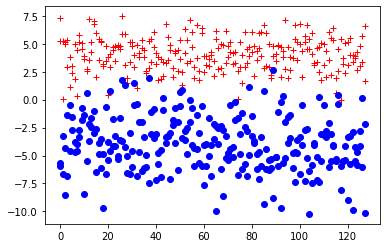

In [6]:
#plot X1 et X2 dans notre data
plt.plot(X1, 'r+') 
plt.plot(X2, 'bo') 

# 1.1.2 Méthode de K-means
### 1. Test de la Méthode de K-means

In [19]:
# test kmeans 
K = 2
kmeans = KMeans(n_clusters=K,n_init=1,init='k-means++')
kmeans.fit(data)

KMeans(n_clusters=2, n_init=1)

In [20]:
np.unique(kmeans.labels_)

array([0, 1])

In [12]:
# test kmeans 
K = 4
kmeans = KMeans(n_clusters=K,n_init=1,init='k-means++')
kmeans.fit(data)

KMeans(n_clusters=4, n_init=1)

In [13]:
np.unique(kmeans.labels_)

array([0, 1, 2, 3])

In [14]:
# test kmeans 
K = 8
kmeans = KMeans(n_clusters=K,n_init=1,init='k-means++')
kmeans.fit(data)

KMeans(n_init=1)

In [15]:
np.unique(kmeans.labels_)

array([0, 1, 2, 3, 4, 5, 6, 7])

In [21]:
y_kmeans = kmeans.predict(data)
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

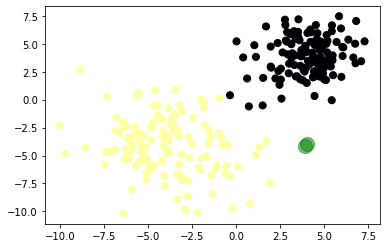

In [22]:
plt.scatter(data[:,0 ], data[:, 1], c=y_kmeans, s=50, cmap='inferno')
centers = kmeans.cluster_centers_
plt.scatter(centers[0,:], centers[1,:], c='green', s=200, alpha=0.5);

In [24]:
#taux d’erreur
adjusted_rand_score(kmeans.labels_, y_kmeans)

1.0

In [38]:
## kmeans refait pour essayer avec n_init
n = 4
K = 2
kmeans = KMeans(n_clusters=K,n_init=n,init='k-means++')
kmeans.fit(data)
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]


In [39]:
y_kmeans = kmeans.predict(data)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

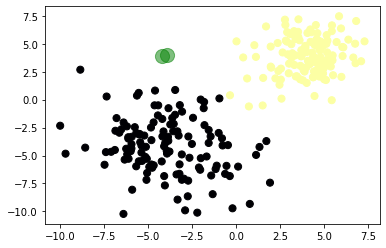

In [40]:
plt.scatter(data[:,0 ], data[:, 1], c=y_kmeans, s=50, cmap='inferno')
centers = kmeans.cluster_centers_
plt.scatter(centers[0,:], centers[1,:], c='green', s=200, alpha=0.5);

## 2. Choix du “bon” nombre de clusters

In [42]:
# Calcul des largeurs de silhouette :
sample_silhouette_values = silhouette_samples(data, kmeans.labels_)

In [43]:
sample_silhouette_values

array([0.73820078, 0.55935962, 0.81871949, 0.79737887, 0.64432647,
       0.73245212, 0.7409538 , 0.59856723, 0.79781215, 0.82482004,
       0.82319695, 0.72846683, 0.73156345, 0.82183646, 0.715478  ,
       0.73231045, 0.81012861, 0.81150368, 0.77826109, 0.82476418,
       0.56469296, 0.79316219, 0.83221502, 0.82579729, 0.82769306,
       0.82971298, 0.72151856, 0.77541515, 0.5770491 , 0.81567104,
       0.81993211, 0.80340987, 0.65323161, 0.82782802, 0.81747211,
       0.83282058, 0.70550036, 0.77877774, 0.79820139, 0.79533173,
       0.81690427, 0.7208317 , 0.72335918, 0.73347605, 0.75006844,
       0.79770855, 0.82827126, 0.68840867, 0.83489408, 0.79017123,
       0.80800377, 0.60690305, 0.78296176, 0.80922472, 0.7393986 ,
       0.79329799, 0.69084244, 0.76582632, 0.65840434, 0.75996809,
       0.78082451, 0.79934133, 0.79941199, 0.83197056, 0.73713971,
       0.78027206, 0.79941422, 0.80050675, 0.77667098, 0.77188696,
       0.83078801, 0.82518211, 0.80685069, 0.82182925, 0.46650

In [41]:
Sil_avg = silhouette_score(data, kmeans.labels_)
print("Pour le nombre de clusters K =", K, "Le coefficient de silhouette est ", Sil_avg)

Pour le nombre de clusters K = 2 Le coefficient de silhouette est  0.688655262357716


In [45]:
#le coefficient d’inertie selon le nombre de clusters (champ kmeans.inertia)
def calculate_wcss(data):
        wcss = []
        for n in range(2, 7):
            kmeans = KMeans(n_clusters=n)
            kmeans.fit(X=data)
            wcss.append(kmeans.inertia_)
            Sil_avg = silhouette_score(data, kmeans.labels_)
            print("Pour le nombre de clusters K =", n, "Le coefficient de silhouette est ", Sil_avg)
    
        return wcss
    
calculate_wcss(data)

Pour le nombre de clusters K = 2 Le coefficient de silhouette est  0.688655262357716
Pour le nombre de clusters K = 3 Le coefficient de silhouette est  0.5618550146974561
Pour le nombre de clusters K = 4 Le coefficient de silhouette est  0.536281605441957
Pour le nombre de clusters K = 5 Le coefficient de silhouette est  0.36361145683072865
Pour le nombre de clusters K = 6 Le coefficient de silhouette est  0.3578466673734252


[2113.8354648886866,
 1517.3277028755895,
 1217.0465716221602,
 987.2533695442216,
 862.3488550904739]

## 1.1.3 Clustering ascendant hiérarchique

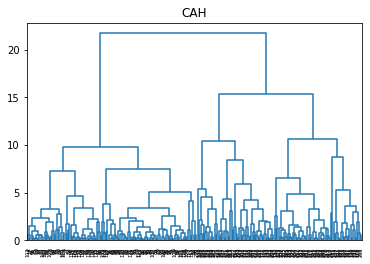

In [50]:
# Calculer les dissimilarités entres les clusters à chaque étape:
Z_complete = CAH(data,method='complete',metric='euclidean')
plt.title("CAH")
d = dendrogram(Z_complete,color_threshold=0)

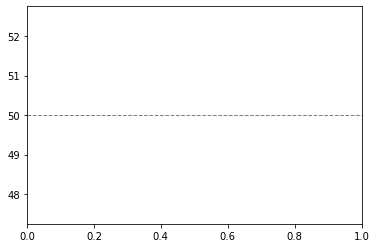

In [49]:
seuil = 50
Z = linkage(data,method='ward',metric='euclidean')
groupes_cah = fcluster(Z, t=seuil, criterion='distance')
# Ajouter la ligne horizontale de la coupe
plt.axhline(y=seuil, c='grey', lw=1, linestyle='dashed')

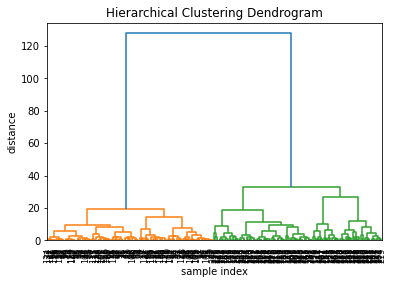

In [51]:
# calculate full dendrogram
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [52]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

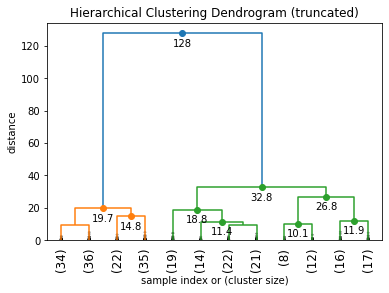

In [53]:
## la hauteur de dendrogramme des clusters fusionnés à chaque étape:
fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,  
)
plt.show()

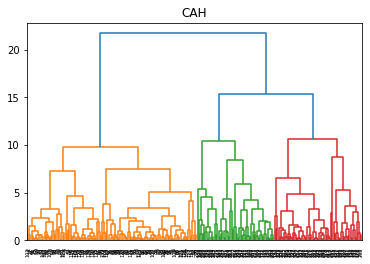

In [54]:
# le résultat du clustering avec trois couleurs
plt.title('CAH')
dendrogram(Z_complete,orientation='top',color_threshold=13)
plt.show()
groupes_cah = fcluster(Z,t=7,criterion='distance')

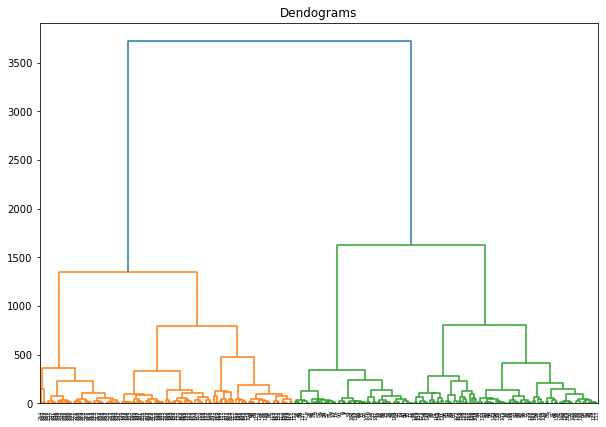

In [56]:
#le coefficient d’ascendance en utilisant l’array Z complete des dissimilarité des clusters
plt.figure(figsize=(10, 7))
plt.title("Dendograms")
dend = sch.dendrogram(sch.linkage(Z_complete, method='ward'))

### Les résultats de clustering en K = 2 clusters avec les quatre méthodes : lien simple single, liencomplet complete, lien moyen average, et la dissimilarité de Ward ward.

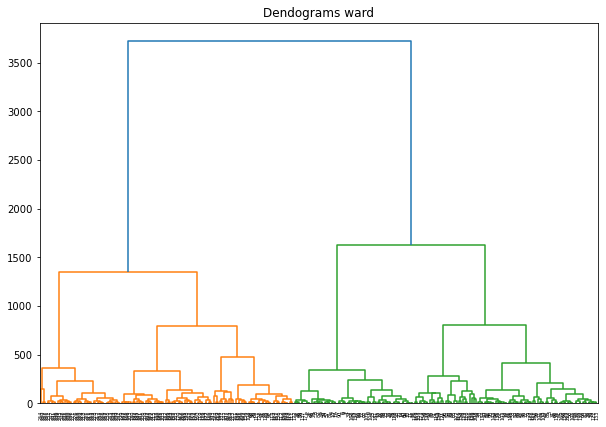

In [64]:
plt.figure(figsize=(10, 7))
plt.title("Dendograms ward")
dend = sch.dendrogram(sch.linkage(Z_complete, method='ward'))

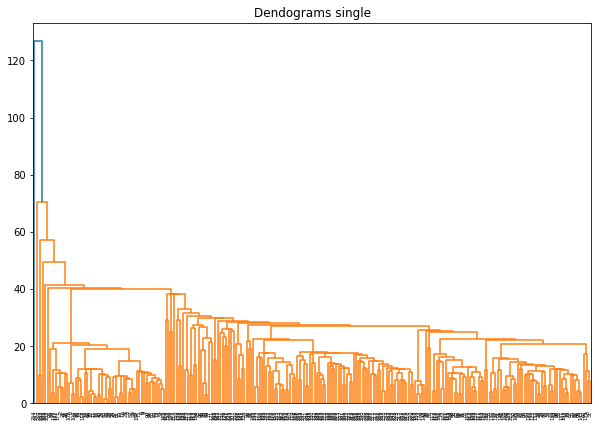

In [63]:
plt.figure(figsize=(10, 7))
plt.title("Dendograms single")
dend = sch.dendrogram(sch.linkage(Z_complete, method='single'))

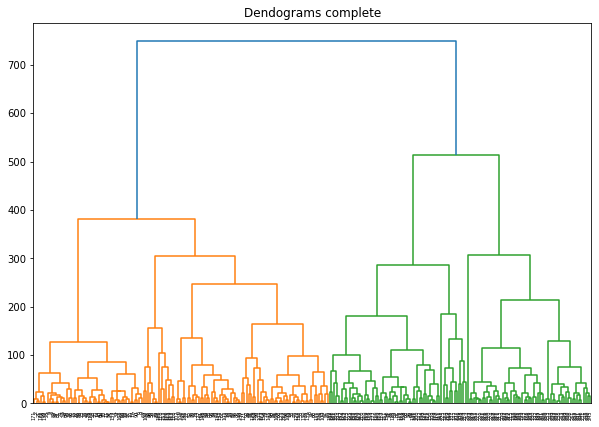

In [61]:
plt.figure(figsize=(10, 7))
plt.title("Dendograms complete")
dend = sch.dendrogram(sch.linkage(Z_complete, method='complete'))

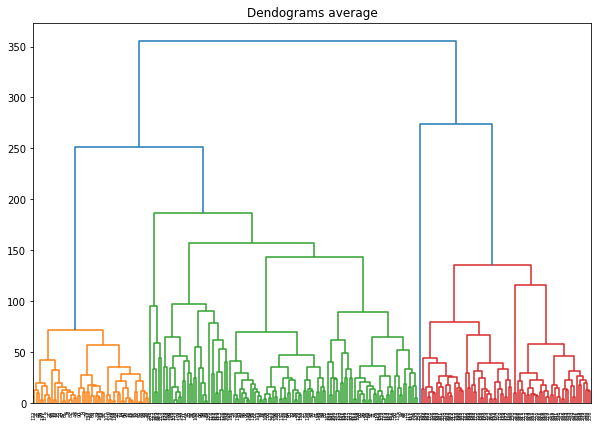

In [62]:
plt.figure(figsize=(10, 7))
plt.title("Dendograms average")
dend = sch.dendrogram(sch.linkage(Z_complete, method='average'))

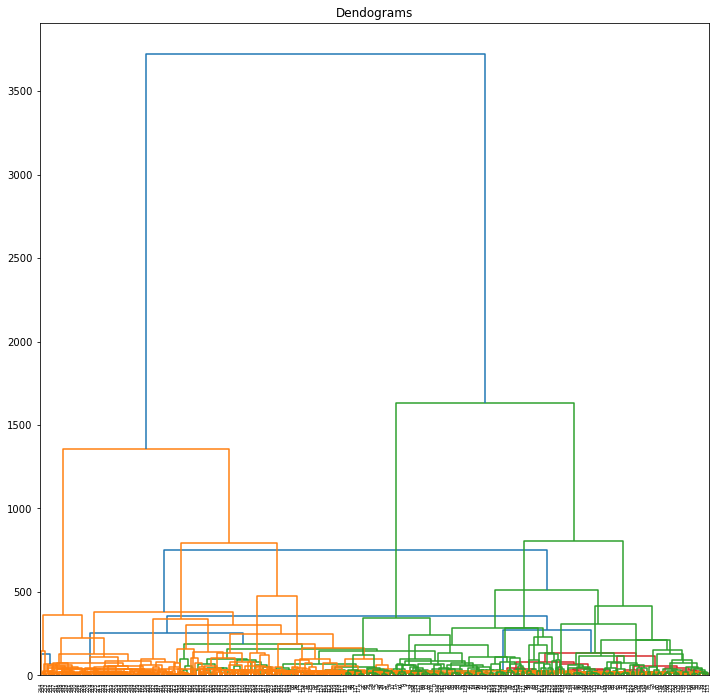

In [71]:
plt.figure(figsize=(12, 12))
plt.title("Dendograms")
dend1 = sch.dendrogram(sch.linkage(Z_complete, method='average'))
dend2 = sch.dendrogram(sch.linkage(Z_complete, method='complete'))
dend3 = sch.dendrogram(sch.linkage(Z_complete, method='single'))
dend4 = sch.dendrogram(sch.linkage(Z_complete, method='ward'))

## 1.2 Application dans un contexte de données réelles
#### 1.2.1 Utilisation de la méthode K-Means pour la réduction de couleur

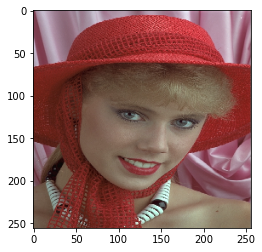

In [72]:
#Charger l’image visage.bmp
im = np.array(Image.open('visage.bmp'))
plt.imshow(im)

In [73]:
#shape 256x256x3
ori_img = Image.open("visage.bmp")
X = np.array(ori_img.getdata())
ori_pixels = X.reshape(*ori_img.size, -1)
ori_pixels.shape

(256, 256, 3)

In [75]:
pixel_vals = im.reshape((-1,3)) 
pixel_vals = np.float32(pixel_vals)

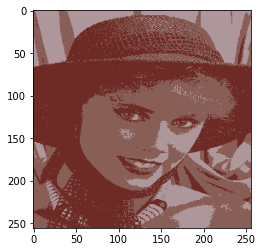

In [76]:
# l’image couleur sous la forme d’un tableau 256*256 lignes et 3 colonnes
image = cv2.imread('visage.bmp')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

#K-means
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85) 

k = 3
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS) 
centers = np.uint8(centers) 

segmented_data = centers[labels.flatten()] 
segmented_image = segmented_data.reshape((image.shape)) 

plt.imshow(segmented_image)

### L’image d’origine par la valeur (R,G,B) du centre de la classe affect´ee au pixel (étape de codage-d´ecodage) et ler résultat de la compression avec une valeur de 255

In [77]:
kmeans = KMeans(n_clusters = 2,
                n_jobs = -1,
                random_state = 123).fit(X)

#RGB
kmeans_df = pd.DataFrame(kmeans.cluster_centers_, columns = ['Red', 'Green', 'Blue'])

D:\Programmes\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [78]:
def replaceWithCentroid(kmeans):
    new_pixels = []
    for label in kmeans.labels_:
        pixel_as_centroid = list(kmeans.cluster_centers_[label])
        new_pixels.append(pixel_as_centroid)
    new_pixels = np.array(new_pixels).reshape(*ori_img.size, -1)
    return new_pixels
new_pixels = replaceWithCentroid(kmeans)

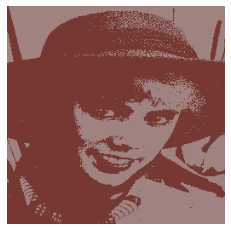

In [79]:
def plotImage(img_array, size):
    reload(plt)
    plt.imshow(np.array(img_array/255).reshape(*size))
    plt.axis('off')
    return plt
    
plotImage(new_pixels, new_pixels.shape).show()

## Variation K

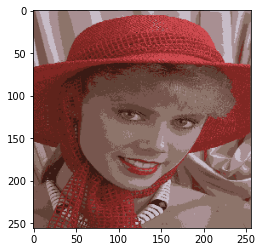

In [80]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85) 

k = 10
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS) 

centers = np.uint8(centers) 
segmented_data = centers[labels.flatten()] 

segmented_image = segmented_data.reshape((image.shape)) 

plt.imshow(segmented_image)

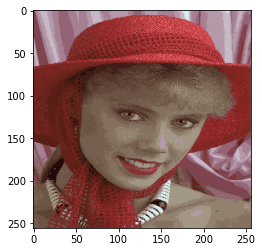

In [81]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85) 

k = 25
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS) 

centers = np.uint8(centers) 
segmented_data = centers[labels.flatten()] 

segmented_image = segmented_data.reshape((image.shape)) 

plt.imshow(segmented_image)

### 1.2.2 Clustering de données de températures

In [89]:
data_temperature = pd.read_csv("temperatures.csv",sep=";",decimal=".",header=0,index_col = 0)
n=len(data_temperature)

In [90]:
print(data_temperature)

                 Janvier  Fevrier  Mars  Avril   Mai  Juin  Juillet  Aout  \
City                                                                        
Amsterdam            2.9      2.5   5.7    8.2  12.5  14.8     17.1  17.1   
Athenes              9.1      9.7  11.7   15.4  20.1  24.5     27.4  27.2   
Berlin              -0.2      0.1   4.4    8.2  13.8  16.0     18.3  18.0   
Bruxelles            3.3      3.3   6.7    8.9  12.8  15.6     17.8  17.8   
Budapest            -1.1      0.8   5.5   11.6  17.0  20.2     22.0  21.3   
Copenhague          -0.4     -0.4   1.3    5.8  11.1  15.4     17.1  16.6   
Dublin               4.8      5.0   5.9    7.8  10.4  13.3     15.0  14.6   
Helsinki            -5.8     -6.2  -2.7    3.1  10.2  14.0     17.2  14.9   
Kiev                -5.9     -5.0  -0.3    7.4  14.3  17.8     19.4  18.5   
Cracovie            -3.7     -2.0   1.9    7.9  13.2  16.9     18.4  17.6   
Lisbonne            10.5     11.3  12.8   14.5  16.7  19.4     21.5  21.9   

In [91]:
print(data_temperature.columns)

Index(['Janvier', 'Fevrier', 'Mars', 'Avril', 'Mai', 'Juin', 'Juillet', 'Aout',
       'Septembre', 'Octobre', 'Novembre', 'Decembre', 'Moyenne', 'Amplitude',
       'Latitude', 'Longitude', 'Region'],
      dtype='object')


In [92]:
data = data_temperature.drop(columns=["Region","Moyenne","Amplitude","Latitude","Longitude"])

In [93]:
data

,Janvier,Fevrier,Mars,Avril,Mai,Juin,Juillet,Aout,Septembre,Octobre,Novembre,Decembre
City,,,,,,,,,,,,
Amsterdam,2.9,2.5,5.7,8.2,12.5,14.8,17.1,17.1,14.5,11.4,7.0,4.4
Athenes,9.1,9.7,11.7,15.4,20.1,24.5,27.4,27.2,23.8,19.2,14.6,11.0
Berlin,-0.2,0.1,4.4,8.2,13.8,16.0,18.3,18.0,14.4,10.0,4.2,1.2
Bruxelles,3.3,3.3,6.7,8.9,12.8,15.6,17.8,17.8,15.0,11.1,6.7,4.4
Budapest,-1.1,0.8,5.5,11.6,17.0,20.2,22.0,21.3,16.9,11.3,5.1,0.7
Copenhague,-0.4,-0.4,1.3,5.8,11.1,15.4,17.1,16.6,13.3,8.8,4.1,1.3
Dublin,4.8,5.0,5.9,7.8,10.4,13.3,15.0,14.6,12.7,9.7,6.7,5.4
Helsinki,-5.8,-6.2,-2.7,3.1,10.2,14.0,17.2,14.9,9.7,5.2,0.1,-2.3
Kiev,-5.9,-5.0,-0.3,7.4,14.3,17.8,19.4,18.5,13.7,7.5,1.2,-3.6


### 1. Classification hiérarchique ascendante (CAH)


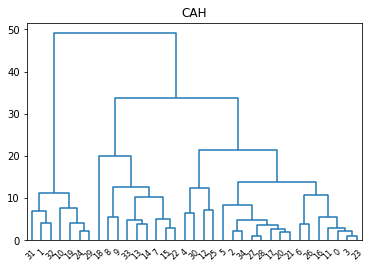

In [94]:
# Calculer les dissimilarités entres les clusters à chaque étape:
Z_complete = CAH(data,method='complete',metric='euclidean')
plt.title("CAH")
d = dendrogram(Z_complete,color_threshold=0)

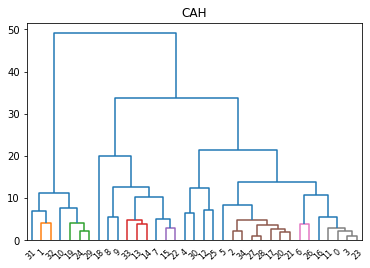

In [100]:
# seuil = 5
Z_complete = CAH(data,method='complete',metric='euclidean')
plt.title("CAH")
d = dendrogram(Z_complete,color_threshold=5)

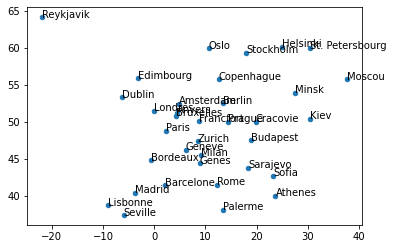

In [25]:
Coord = data_temperature.loc[:,['Latitude','Longitude']].values
#Celle ligne permet d’extraire les coordonn´ees
plt.scatter(Coord[:, 1], Coord[:, 0], s=20, cmap='viridis')
#On place les points
nom_ville = list(data.index)
for i, txt in enumerate(nom_ville):
    plt.annotate(txt, (Coord[i, 1], Coord[i, 0])) #On place le nom des villes

### K-means

In [26]:
K = 2
kmeans = KMeans(n_clusters=K,n_init=1,init='k-means++')
kmeans.fit(data)
print(kmeans.labels_)

[1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 0 0 0 0 1 1]


In [28]:
y_kmeans = kmeans.predict(data)
y_kmeans

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1])

In [30]:
Sil_avg = silhouette_score(data, kmeans.labels_)
print("Pour le nombre de clusters K =", K, "Le coefficient de silhouette est ", Sil_avg)

Pour le nombre de clusters K = 2 Le coefficient de silhouette est  0.548271664038952


In [31]:
#le coefficient d’inertie selon le nombre de clusters (champ kmeans.inertia)
def calculate_wcss(data):
        wcss = []
        for n in range(2, 21):
            kmeans = KMeans(n_clusters=n)
            kmeans.fit(X=data)
            wcss.append(kmeans.inertia_)
            Sil_avg = silhouette_score(data, kmeans.labels_)
            print("Pour le nombre de clusters K =", n, "Le coefficient de silhouette est ", Sil_avg)
    
        return wcss
    
calculate_wcss(data)

Pour le nombre de clusters K = 2 Le coefficient de silhouette est  0.548271664038952
Pour le nombre de clusters K = 3 Le coefficient de silhouette est  0.5057002038494899
Pour le nombre de clusters K = 4 Le coefficient de silhouette est  0.4444447296138412
Pour le nombre de clusters K = 5 Le coefficient de silhouette est  0.4390610496116648
Pour le nombre de clusters K = 6 Le coefficient de silhouette est  0.4499486009530438
Pour le nombre de clusters K = 7 Le coefficient de silhouette est  0.40798121937359405
Pour le nombre de clusters K = 8 Le coefficient de silhouette est  0.3826025199076852
Pour le nombre de clusters K = 9 Le coefficient de silhouette est  0.4189676138565845
Pour le nombre de clusters K = 10 Le coefficient de silhouette est  0.3587491857573258
Pour le nombre de clusters K = 11 Le coefficient de silhouette est  0.35142140555423745
Pour le nombre de clusters K = 12 Le coefficient de silhouette est  0.3836618228073602
Pour le nombre de clusters K = 13 Le coefficient d

[2835.6024,
 1436.0813888888886,
 1106.713849206349,
 835.245273809524,
 613.3122380952382,
 544.1356904761905,
 455.80545238095243,
 388.1496031746032,
 333.3296428571429,
 303.79761904761904,
 224.9811904761905,
 199.7911904761905,
 175.55285714285716,
 151.88785714285717,
 144.17119047619047,
 115.03619047619048,
 101.68452380952382,
 87.72200000000002,
 75.10866666666668]

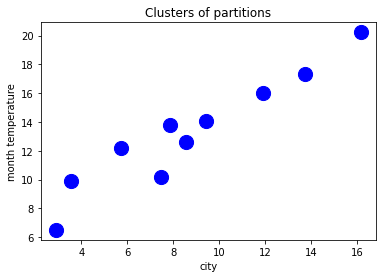

In [76]:
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='blue', label = 'Centroids')
plt.title('Clusters of partitions')
plt.xlabel('city')
plt.ylabel('month temperature')
plt.show()

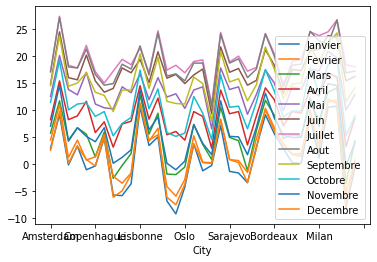

In [48]:
data.plot()
plt.show()

## 2. Réalisation informatique et tests

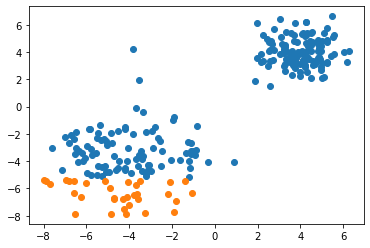

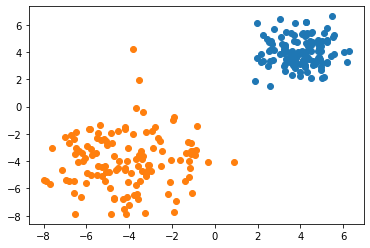

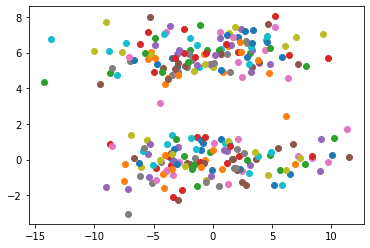

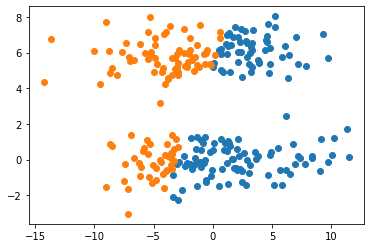

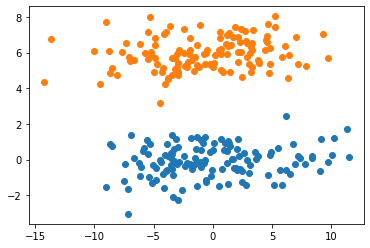

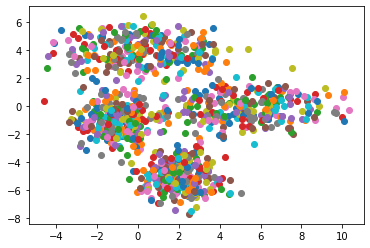

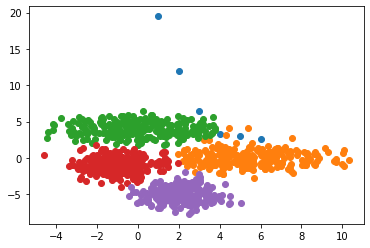

In [101]:
'''
Copyright Rania BEN DHIA et Marwan AL OMARI

'''
def dist(X,Y):
    return np.dot(np.transpose(X-Y),(X-Y))


def coalescence(x,K,g) :
    m,n=x.shape
    niter=0
    t=0
    ginit=np.zeros((2,K))
    clas = np.zeros(n)
    while (t < niter) or (np.array_equal(g,ginit) == False) :
        t=t+1
        ginit=g
        D=np.zeros((n,K))
        N=np.zeros(K)
        S=np.zeros((2,K))
        for k in range(K) :
            for i in range(n):
                D[i,k]= dist(x[:,i],g[:,k])
        for i in range(n):
            clas[i]=D[i,:].argmin()
            for k in range(K):
                if clas[i] == k:
                    N[k]=N[k]+1
                    S[:,k]=S[:,k]+x[:,i]
        for k in range(K):
            g[:,k] = N[k]**(-1)*S[:,k]
            
    somme = 0
    for k in range(K):
        for i in range(n):
            if clas[i] == k:
                somme=somme+dist(x[:,i],g[:,k])
    W = somme/n
    return [clas, g, W]
            
  

def affiche_classe(x,clas,K):
    for k in range(0,K):
        ind=(clas==k)
        plt.plot(x[0,ind],x[1,ind],"o")
    plt.show()


   
mean1 = np.array([4,4])
cov1 = np.array([[1,0],[0,1]])
X1 = np.random.multivariate_normal(mean1,cov1,128)
mean2 = np.array([-4,-4])
cov2 = np.array([[4,0],[0,4]])
X2 = np.random.multivariate_normal(mean2,cov2,128)
data = np.concatenate((X1,X2), axis=0)
data=np.transpose(data)


def crea_ginit(data, K):
    m,n = data.shape
    g = np.zeros((2,K))
    for k in range(K) :
        i = random.randint(0,n-1)
        g[:,k] = data[:,i]
    return g



ginit = crea_ginit(data,2)
[clas, g, W]=coalescence(data,2,ginit)
affiche_classe(data,clas,2)
clas1 = np.concatenate((np.zeros(128),np.ones(128)))
affiche_classe(data,clas1,2)


x1 = np.loadtxt("kmean_d1.txt",dtype=float)
m,n = x1.shape
for i in range(n) :
    plt.plot(x1[0,i], x1[1,i], "o")
plt.show()

ginit2 = crea_ginit(x1,2)
[clas2, g2, W2]=coalescence(x1,2,ginit2)
affiche_classe(x1,clas2,2)


def crea_ginit2(data,K):
    m,n = data.shape
    g = np.zeros((2,K))
    N=np.zeros(K)
    for k in range(K-1):
        N[k] = n//K
    N[K-1]=n-sum(N)

    i=0
    j=int(N[0])
    for k in range (K):
        g[0,k]=sum(data[0,i:j])/N[k]
        g[1,k]=sum(data[1,i:j])/N[k]
        i=int(i+N[k])
        if k<K-1:
            j=int(j+N[k+1])
    return g 

ginit3 = crea_ginit2(x1,2)
[clas3, g3, W3]=coalescence(x1,2,ginit3)
affiche_classe(x1,clas3,2)        




x2 = np.loadtxt("kmean_d3.txt",dtype=float)
m,n = x2.shape
for i in range(n) :
    plt.plot(x2[0,i], x2[1,i], "o")
plt.show()


W=np.zeros(6)
for i in range (1,7):
    ginit4 = crea_ginit2(x2,i)
    [clas4, g4, W4]=coalescence(x2,i,ginit4)
    W[i-1]=W4
plt.plot([1,2,3,4,5,6],W,"o")

   
ginit4 = crea_ginit2(x2,4)
[clas4, g4, W4]=coalescence(x2,4,ginit4)
affiche_classe(x2,clas4,4)

### A vous de tester :) 